# C3M3: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Implement kernel smoothing in R and interpret the results.

2. Implement smoothing splines as an alternative to kernel estimation.

3. Implement and interpret the loess smoother in R.

4. Compare and contrast nonparametric smoothing methods.


General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [145]:
# Load Required Packages
library(ggplot2)
library(mgcv)
library(gridExtra) # Subplot pack

# Problem 1: Advertising data

The following dataset containts measurements related to the impact of three advertising medias on sales of a product, $P$. The variables are:

- `youtube`: the advertising budget allocated to YouTube. Measured in thousands of dollars;

- `facebook`: the advertising budget allocated to Facebook. Measured in thousands of dollars; and 

- `newspaper`: the advertising budget allocated to a local newspaper. Measured in thousands of dollars.

- `sales`: the value in the $i^{th}$ row of the sales column is a measurement of the sales (in thousands of units) for product $P$ for company $i$.

The advertising data treat "a company selling product $P$" as the statistical unit, and "all companies selling product $P$" as the population. We assume that the $n = 200$ companies in the dataset were chosen at random from the population (a strong assumption!).

First, we load the data, plot it, and split it into a training set (`train_marketing`) and a test set (`test_marketing`).

    youtube          facebook       newspaper          sales      
 Min.   :  0.84   Min.   : 0.00   Min.   :  0.36   Min.   : 1.92  
 1st Qu.: 89.25   1st Qu.:11.97   1st Qu.: 15.30   1st Qu.:12.45  
 Median :179.70   Median :27.48   Median : 30.90   Median :15.48  
 Mean   :176.45   Mean   :27.92   Mean   : 36.66   Mean   :16.83  
 3rd Qu.:262.59   3rd Qu.:43.83   3rd Qu.: 54.12   3rd Qu.:20.88  
 Max.   :355.68   Max.   :59.52   Max.   :136.80   Max.   :32.40  

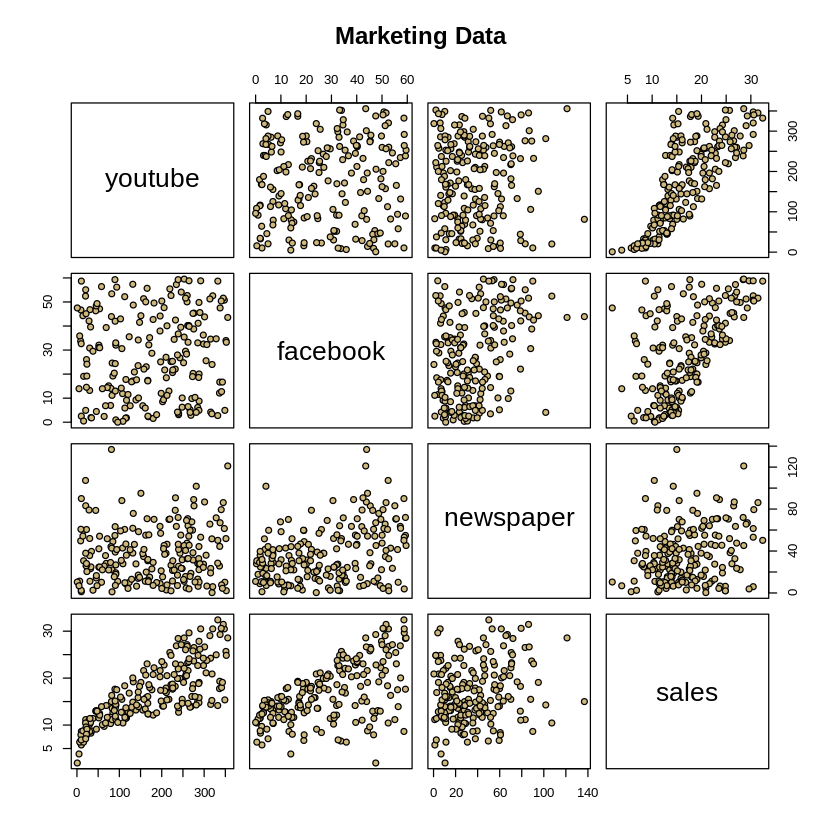

In [148]:
# Load in the data
marketing = read.csv("marketing.txt", sep="")
summary(marketing)
pairs(marketing, main = "Marketing Data", pch = 21, 
      bg = c("#CFB87C"))

In [149]:
set.seed(1771) #set the random number generator seed.
n = floor(0.8 * nrow(marketing)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(marketing)), size = n) #randomly sample indicies to be included in the training set

train_marketing = marketing[index, ] #set the training set to be the randomly sampled rows of the dataframe
test_marketing = marketing[-index, ] #set the testing set to be the remaining rows
dim(test_marketing) #check the dimensions
dim(train_marketing) #check the dimensions

[1] 40  4

[1] 160   4

**1.(a) Working with nonlinearity: Kernel regression**

Note that the relationship between `sales` and `youtube` is nonlinear. This was a problem for us back in the first course in this specialization, when we modeled the data as if it were linear. For now, let's just focus on the relationship between `sales` and `youtube`, omitting the other variables (future lessons on generalized additive models will allow us to bring back other predictors).

Using the `train_marketing` set, plot `sales` (response) against `youtube` (predictor), and then fit and overlay a kernel regression. Experiment with the bandwidth parameter until the smooth looks appropriate, or comment why no bandwidth is ideal. Justify your answer.

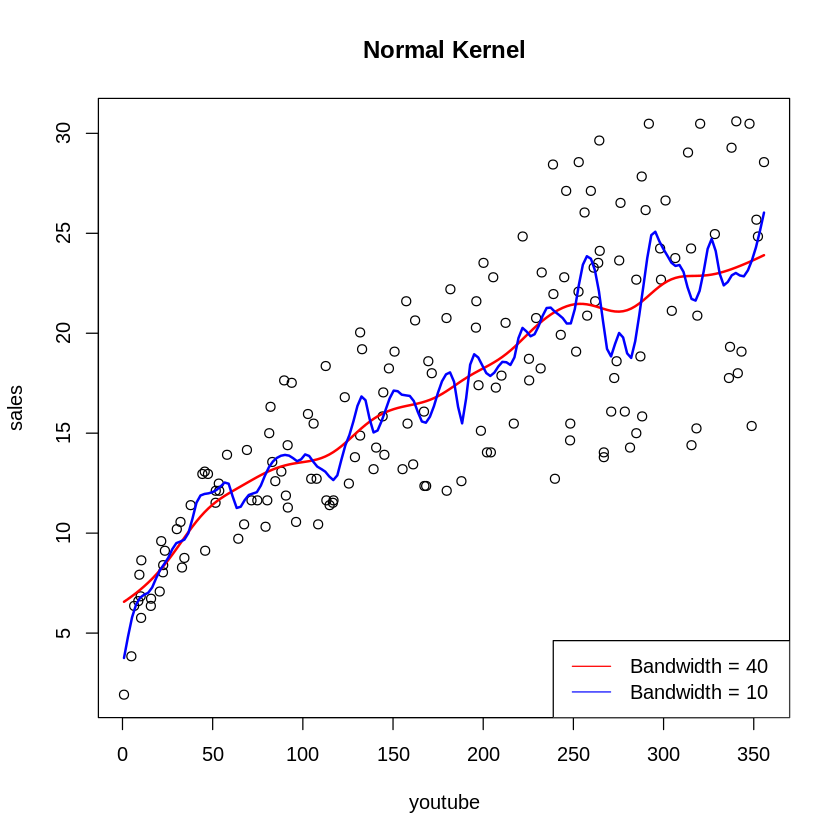

In [257]:
# Create a scatter plot of sales vs. youtube with kernel smoothing
# Plot sales vs. youtube
plot(sales ~ youtube, data = train_marketing, main = "Normal Kernel")
# Red line: bandwidth = 40 
lines(ksmooth(train_marketing$youtube, train_marketing$sales, kernel = "normal", bandwidth = 40), col = "red", lwd = 2)
# Blue Line: bandwidth = 10 
lines(ksmooth(train_marketing$youtube, train_marketing$sales, kernel = "normal", bandwidth = 10), col = "blue", lwd = 2)

# Add a legend to distinguish the two lines
legend("bottomright", legend = c("Bandwidth = 40", "Bandwidth = 10"), 
       col = c("red", "blue"), lty = 1, lwd = 2)


#### Analysis
- A smaller bandwidths (bandwidth = 10) can track steep nonlinearities in the data, but they may result in an overly "wiggly" or erratic curve, particularly in certain regions (such as the upper regions of the youtube variable).
- A larger bandwidths (bandwidth = 40) provide a smoother curve, avoiding the excessive wiggliness, but they may fail to capture steep changes or nonlinear patterns, especially in the areas where the response changes rapidly.

**1.(b) Working with nonlinearity: Smoothing spline regression**

Again, using the `train_marketing` set, plot `sales` (response) against `youtube` (predictor). This time, fit and overlay a smoothing spline regression model. Experiment with the smoothing parameter until the smooth looks appropriate. Explain why it's appropriate and justify your answer.

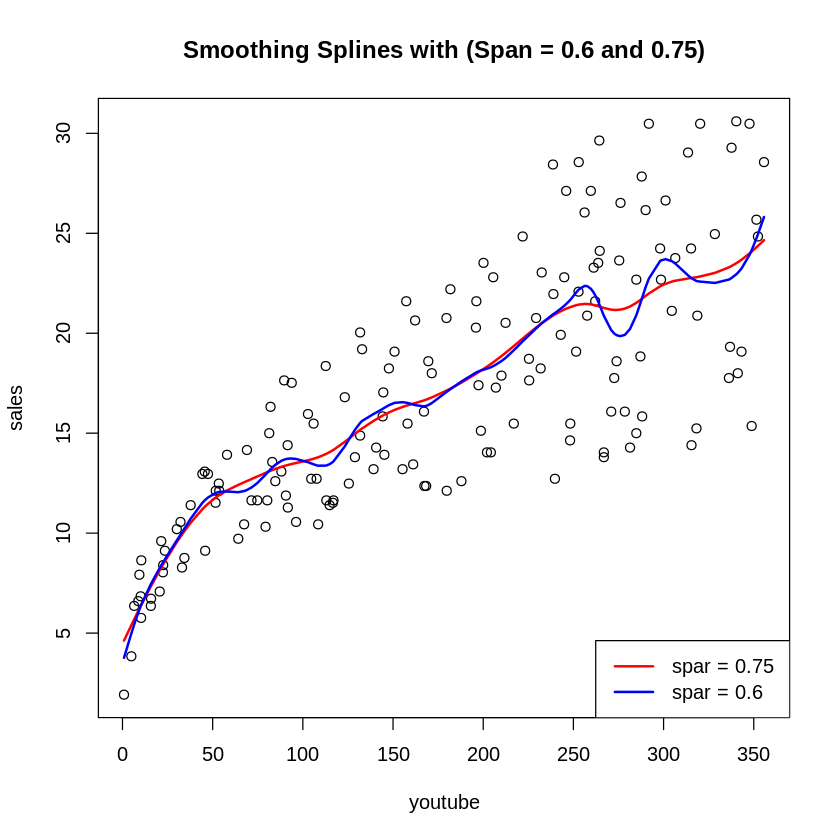

In [265]:
# Fit smoothing splines with different spar values
marketing_smooth_0.75 = with(train_marketing, smooth.spline(y = sales, x = youtube, spar = 0.75))
marketing_smooth_0.6 = with(train_marketing, smooth.spline(y = sales, x = youtube, spar = 0.6))

# Plot sales vs. youtube
plot(sales ~ youtube, data = train_marketing, main = "Smoothing Splines with (Span = 0.6 and 0.75)")

# Red line: spar = 0.75 
lines(marketing_smooth_0.75, col = "red", lwd = 2)
# Blue Line: spar = 0.6
lines(marketing_smooth_0.6, col = "blue", lwd = 2)

# Add a legend to distinguish the two lines
legend("bottomright", legend = c("spar = 0.75", "spar = 0.6"), 
       col = c("red", "blue"), lty = 1, lwd = 2)


This method does a better job of capturing sharp nonlinear variations in the higher part of the youtube range without being too 'wiggly'. With spar = 0.75, the fit curve tracks the sharp nonlinear variations well, and the fluctuations remain relatively small ,although it is still not ideal.

**1.(c) Working with nonlinearity: Loess**

Again, using the `train_marketing` set, plot `sales` (response) against `youtube` (predictor). This time, fit and overlay a loess regression model. You can use the `loess()` function in a similar way as the `lm()` function. Experiment with the smoothing parameter (`span` in the `geom_smooth()` function) until the smooth looks appropriate. Explain why it's appropriate and justify your answer.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



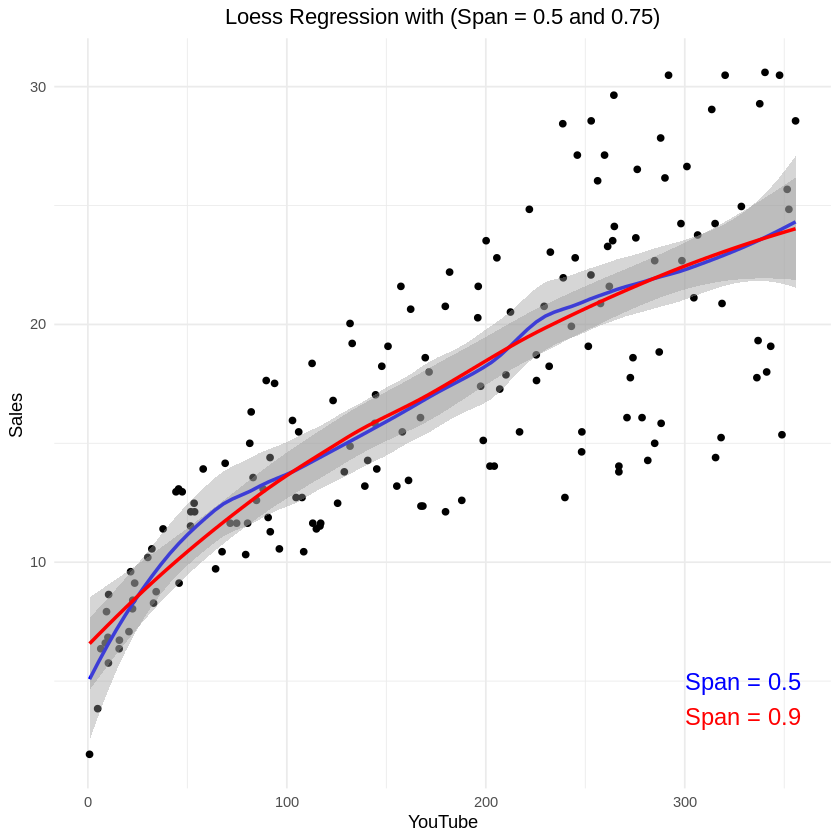

In [267]:
# Fit loess regression model
loess_fit = loess(sales ~ youtube, data = train_marketing, span = 0.5)  # Adjust span for different smoothness levels

# Predict values using loess model
loess_pred = predict(loess_fit, newdata = data.frame(youtube = train_marketing$youtube))

# Plot with different span values
ggplot(train_marketing, aes(x = youtube, y = sales)) +
  geom_point() +
  geom_smooth(method = "loess", span = 0.5, color = "blue") +
  geom_smooth(method = "loess", span = 0.9, color = "red") +
  labs(title = "Loess Regression with (Span = 0.5 and 0.75)", 
       x = "YouTube", y = "Sales ") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_color_manual(values = colors) +
  annotate("text", x = 300, y = 5, label = "Span = 0.5", color = "blue", size = 5, hjust = 0) +
  annotate("text", x = 300, y = 3.5, label = "Span = 0.9", color = "red", size = 5, hjust = 0)

#### Analysis

- Low Span (0.5): Results in a curve that follows the data more closely, which can capture more local details but may be sensitive to noise (overfitting).
- High Span (0.9): Results in a smoother curve that captures the general trend but might oversmooth and miss local fluctuations (underfitting).

We can see that Loess does a great job when span = 0.5, it successsfully capturing the nonlinearity at low values of youtube as well as avoiding fluctuation at the upper data.

**1.(d) A prediction metric**

Compare the models using the mean squared prediction error (MSPE) on the `test_marketing` dataset. That is, calculate the MSPE for your kernel regression, smoothing spline regression, and loess model, and identify which model is best in terms of this metric.

Remember, the MSPE is given by 

\begin{align*}
MSPE = \frac{1}{k}\sum^k_{i=1}\left(y^\star_i - \widehat{y}^\star_i \right)^2 
\end{align*}

where $y^\star_i$ are the observed response values in the test set and $\widehat{y}^\star_i$ are the predicted values for the test set (using the model fit on the training set).

\*Note that `ksmooth()` orders your designated `x.points`. Make sure to account for this in your MSPE calculation.

In [269]:
#Note, ksmooth() orders the youtube values. Ensure that you order test_marketing by youtube before calculating MSPE
yhat_kr = ksmooth(train_marketing$youtube, train_marketing$sales, kernel = "normal", 40, x.points = test_marketing$youtube)
paste("The MSPE for kernel regression is", mean((test_marketing[order(test_marketing$youtube),"sales"] - yhat_kr$y)^2),".")

yhat_ss = predict(marketing.smooth, x = test_marketing$youtube); 
paste("The MSPE for smoothing spline regression is",mean((test_marketing$sales - yhat_ss$y)^2), ".")
yhat_loess = predict(lr, newdata = test_marketing$youtube); 
paste("The MSPE for loess regression is", mean((test_marketing$sales - yhat_loess)^2), ".")

[1] "The MSPE for kernel regression is 18.2609352643162 ."

[1] "The MSPE for smoothing spline regression is 18.1211942436849 ."

[1] "The MSPE for loess regression is 18.1148323815482 ."

#### Conclusion
- The MSPE for kernel regression **(18.26)** is the highest, indicating that kernel regression has relatively larger prediction errors, suggesting it may not be as accurate in capturing the nonlinear relationship as the other two methods.
- The MSPE for smoothing spline regression **(18.12)** is slightly lower than kernel regression, indicating that spline regression is able to capture the patterns and trends in the data a little better.
- The MSPE for loess regression **(18.11)** is the lowest, showing that it provides the most accurate predictions for this dataset.

Overall, although the MSPE differences between the three models are small, **Loess regression** performs the best on this dataset, followed by **smoothing spline regression**, while **kernel regression** performs relatively worse. The advantage of Loess regression likely lies in its flexibility, allowing it to better capture the local nonlinear trends in the data.

# Problem 2: Simulations!

Simulate data (one predictor and one response) with your own nonlinear relationship. Provide an explanation of how you generated the data. Then answer the questions above (1.(a) - 1.(d)) using your simulated data.

[1] 160   2

[1] 40  2

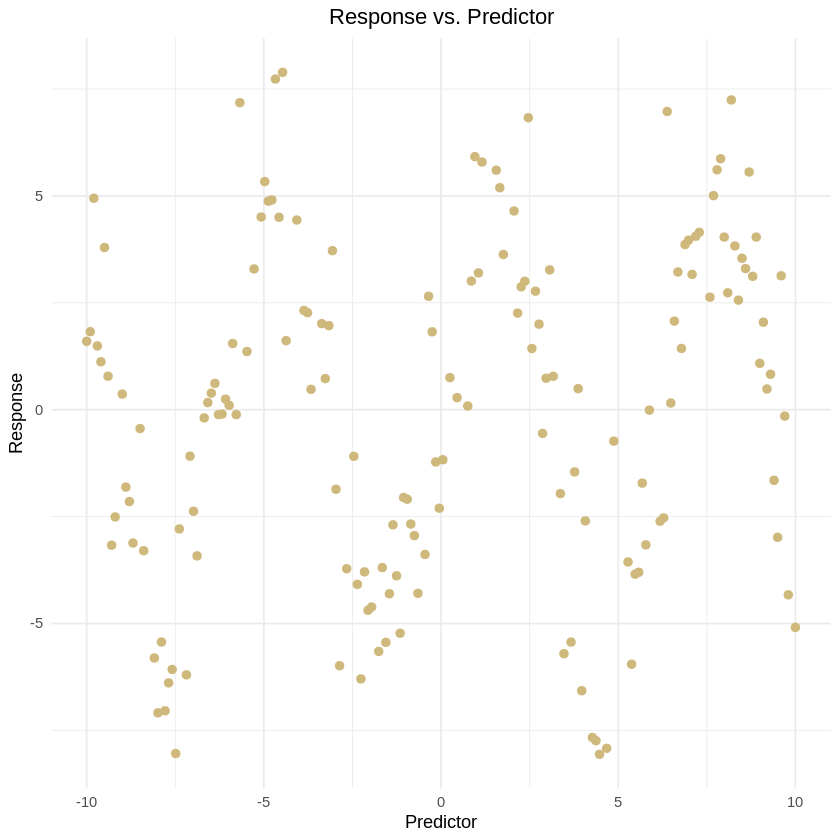

In [282]:
#simulated data
set.seed(123)
# Simulate data
n = 200
x = seq(-10, 10, length.out = n)  # Predictor variable

# Nonlinear relationship: quadratic function with added noise
y = 5 * sin(x) + rnorm(n, sd = 2)  # Response variable with noise

# Create a data frame
simulated_data = data.frame(predictor = x, response = y)

# Split data into training and test sets
set.seed(123)
n_train = floor(0.8 * n)
train_index = sample(seq_len(n), size = n_train)
simulated_train_data = simulated_data[train_index, ]
simulated_test_data = simulated_data[-train_index, ]

dim(simulated_train_data) #check the dimensions
dim(simulated_test_data) #check the dimensions

# Plot sales vs. predictor in the training set
ggplot(simulated_train_data, aes(x = predictor, y = response)) +
  geom_point(color = "#CFB87C", size = 2) +
  labs(title = "Response vs. Predictor", 
       x = "Predictor", y = "Response") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

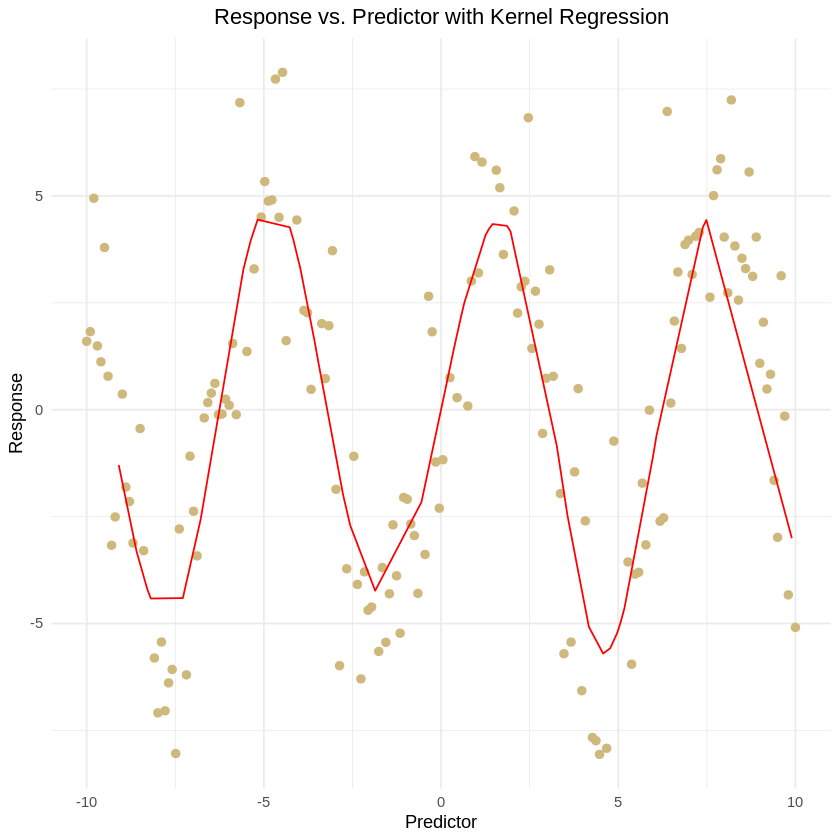

In [283]:
#1.a
kernel_fit = gam(response ~ s(predictor, bs = "cs", k = 15), data = simulated_train_data)
predicted_values_kernel = data.frame(predictor = simulated_test_data$predictor)
predicted_values_kernel$response = predict(kernel_fit, newdata = predicted_values_kernel)

ggplot(simulated_train_data, aes(x = predictor, y = response)) +
  geom_point(color = "#CFB87C", size = 2) +
  geom_line(data = predicted_values_kernel, aes(x = predictor, y = response), color = 'red') + 
  labs(title = "Response vs. Predictor with Kernel Regression", 
       x = "Predictor", y = "Response") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

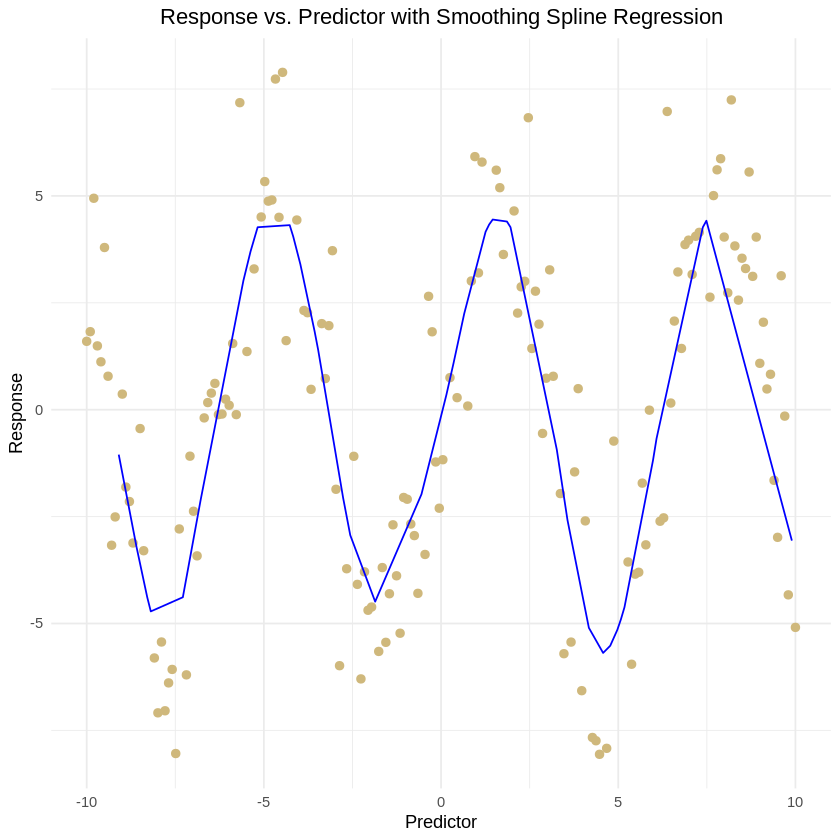

In [273]:
#1.b
spline_fit = smooth.spline(simulated_train_data$predictor, simulated_train_data$response, spar = 0.6)
spline_pred = predict(spline_fit, x = simulated_test_data$predictor)$y
predicted_values_spline = data.frame(predictor = simulated_test_data$predictor, response = spline_pred)

ggplot(train_data, aes(x = predictor, y = response)) +
  geom_point(color = "#CFB87C", size = 2) +
  geom_line(data = predicted_values_spline, aes(x = predictor, y = response), color = 'blue') +
  labs(title = "Response vs. Predictor with Smoothing Spline Regression", 
       x = "Predictor", y = "Response") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

`geom_smooth()` using formula 'y ~ x'



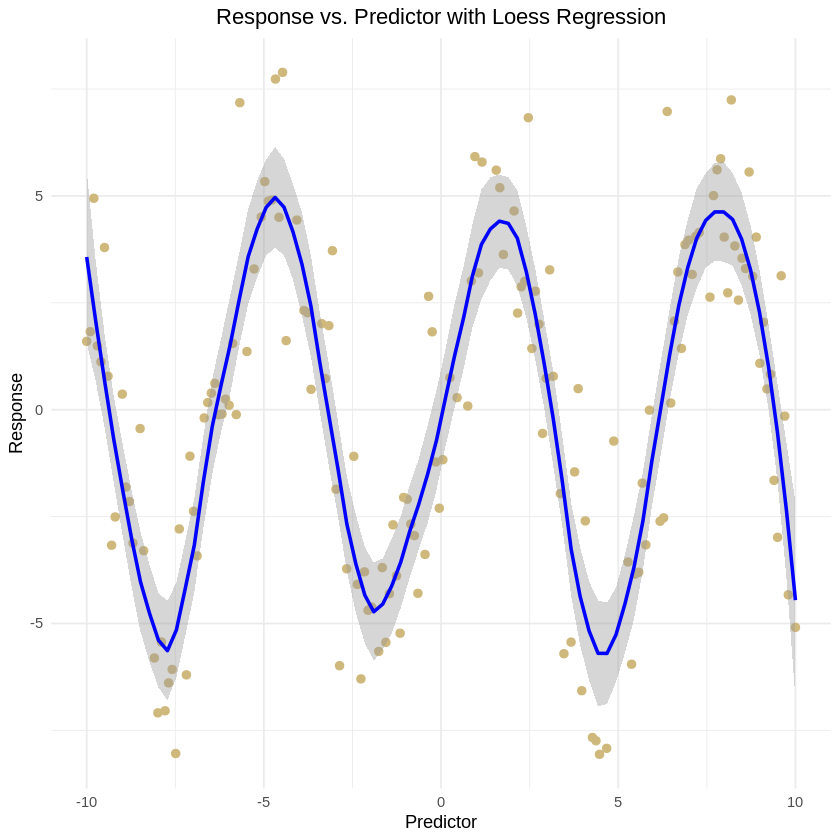

In [284]:
#1.c
loess_fit = loess(response ~ predictor, data = simulated_train_data, span = 0.2)
loess_pred = predict(loess_fit, newdata = simulated_test_data$predictor)
predicted_values_loess = data.frame(predictor = simulated_test_data$predictor, response = loess_pred)

ggplot(simulated_train_data, aes(x = predictor, y = response)) +
  geom_point(color = "#CFB87C", size = 2) +
  geom_smooth(method = "loess", span = 0.2, color = "blue") +
  labs(title = "Response vs. Predictor with Loess Regression", 
       x = "Predictor", y = "Response") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

In [285]:
#1.d
mspe_kernel = mean((test_data$response - predicted_values_kernel$response)^2)
mspe_spline = mean((test_data$response - predicted_values_spline$response)^2)
mspe_loess = mean((test_data$response - predicted_values_loess$response)^2)

# Print MSPE values
paste("MSPE for Kernel Regression:", mspe_kernel)
paste("MSPE for Smoothing Spline Regression:", mspe_spline)
paste("MSPE for Loess Regression:", mspe_loess)


[1] "MSPE for Kernel Regression: 2.97736913703344"

[1] "MSPE for Smoothing Spline Regression: 2.98157202657425"

[1] "MSPE for Loess Regression: 2.89856673550958"

The MSPE values indicate the performance of each regression model on the test set, where a lower MSPE means the model is better at making predictions for unseen data. Here’s what the results show:

- **Kernel Regression MSPE: 2.98**
- **Smoothing Spline Regression MSPE: 2.98**
- **Loess Regression MSPE: 2.90**

#### Interpretation:

1. **Loess Regression has the lowest MSPE**, suggesting that it performed the best in terms of predictive accuracy on the test set. This implies that for the given simulated data, loess regression captured the nonlinear relationship between the predictor and the response most effectively.

2. **Kernel Regression and Smoothing Spline Regression have similar MSPEs**, slightly higher than loess regression. This indicates that both models perform comparably but are marginally less effective at capturing the relationship than loess in this case.

#### Conclusion:

Loess regression may be the preferred model based on this simulation, as it achieved the lowest prediction error. However, the differences between the models' performances are relatively small, suggesting that all three methods are reasonable choices for modeling the nonlinear relationship in this dataset.

These results could reflect the fact that loess is particularly well-suited to handling locally varying nonlinear relationships, especially when the data has more subtle variations that a global model like kernel or smoothing splines might struggle with slightly.